

# Movies data analysis

### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

- This dataset contains information about **movies** from **1960 to 2015**.  
- It includes details like **genres, cast, ratings, and release dates**.  
- The dataset provides useful data for analysis, such as **financial statistics and movie trends**.  
- However, it does **not** include movies from **streaming platforms** like **Netflix, Amazon Prime, or Disney**.  
- Because of this, recent trends in the movie industry are **not covered**.

### Question for Analysis
####  in this data we will ask some analysis questions like:<br><br>
*  What year had the most movies ?<br><br>
*  What was the most polpular genere 2000s vs 1900s ?<br><br>


In [1]:
#we start by importing basic libraries to clean and mangae data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


# <a id='wrangling'></a>
## Data Wrangling



#### General Properties
>Before starting into analysis, it's important to explore the dataset’s structure and basic characteristics. This helps identify missing values, data types, and more

In [2]:
#we download our csv file of data and showing it
data = pd.read_csv("tmdb-movies.csv")
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#we determine our data shape
data.shape

(10866, 21)

In [4]:
#we see our data special value like max ,min and etc
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
#we see our data frame type to be easier to manage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning

 

In [6]:
#colomns that will not be used or it is dublicated
data.drop(columns=['id', 'imdb_id', 'homepage',  'overview', 'keywords','release_year' ,'production_companies','tagline'] , axis = 1 , inplace=True)

In [7]:
#checking if there is null
data.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
budget_adj         0
revenue_adj        0
dtype: int64

In [8]:
#filling missing director or cast name 
data['cast'] = data['cast'].fillna("Unknown")
data['director'] = data['director'].fillna("Unknown")
#fill missing tagline with no tagline and keywords with no keywords and overview and generes and production company
data['genres'] = data['genres'].fillna("Unknown Genre")


In [9]:
#check if there is still missing data
data.isnull().sum()

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
budget_adj        0
revenue_adj       0
dtype: int64

In [10]:
#check the dublicted data
data.duplicated().sum()

1

In [11]:
#fixing duplicates problem and checking if any other duplicates
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [12]:
# Fix unrealistic values in budget, revenue, budget_adj, revenue_adj, and runtime
for col in ['budget', 'revenue', 'budget_adj', 'revenue_adj', 'runtime']:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Ensure numeric
    median_val = data.loc[data[col] > 0, col].median()  # Get median of non-zero values
    data.loc[data[col] == 0, col] = median_val  # Replace zeros

data.describe()#check the budget and revenue it is not zeros anymore

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,2.353657e+07,5.746409e+07,102.354257,217.399632,5.975012,2.945831e+07,7.570801e+07
std,1.000231,2.769628e+07,1.119674e+08,30.904560,575.644627,0.935138,2.979407e+07,1.374663e+08
min,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,9.210911e-01,2.370705e+00
25%,0.207575,1.700000e+07,3.185308e+07,90.000000,17.000000,5.400000,2.271505e+07,4.395666e+07
50%,0.383831,1.700000e+07,3.185308e+07,99.000000,38.000000,6.000000,2.271505e+07,4.395666e+07
75%,0.713857,1.700000e+07,3.185308e+07,111.000000,146.000000,6.600000,2.271505e+07,4.395666e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


In [13]:
#fix the problem of release date as object converting it to integer to be easier to mange with
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

### After cleaning our data we will start EDA by analyzing the asked question and giving answer for

<a id='eda'></a>
## Exploratory Data Analysis

>In Exploratory Data Analysis (EDA), I will first explore the dataset by summarizing key statistics, checking for missing values, and identifying data distributions. Then, I will visualize trends, correlations, and outliers

### What year was the most movies ?

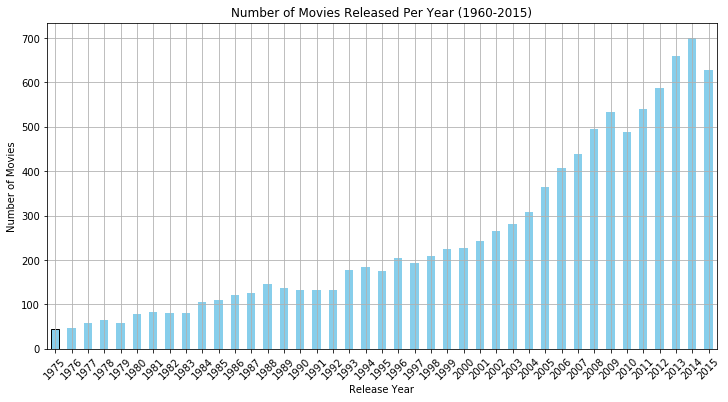

In [14]:
# Convert release_date to datetime and extract year
data['year'] = pd.to_datetime(data['release_date'], errors='coerce').dt.year

# Plot movie count per year (1960-2015)
data['year'].loc[data['year'].between(1960, 2015)].value_counts().sort_index().plot(
    kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black', grid=True)

plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Per Year (1960-2015)')
plt.xticks(rotation=45)
plt.show()

#### As we see movies industry started to grow from 1960 to 2015 dramaticly increasing

### What was the most polpular genere 2000s vs 1900s ?

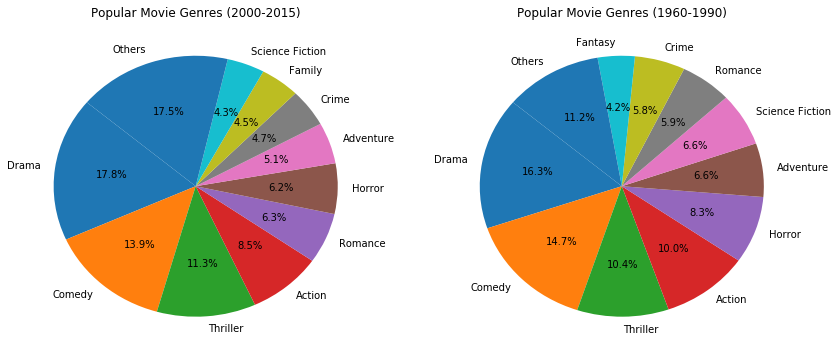

In [15]:
#make an asked function that take values aout plot and generate ratios i need
def genre_distribution(data, start, end, ax):
    data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
    genres = data.loc[data['release_date'].dt.year.between(start, end), 'genres'].dropna().str.split('|').sum()
    genre_counts = pd.Series(genres).value_counts()

    # Group small genres into Others
    genre_counts['Others'] = genre_counts[genre_counts < genre_counts.sum() * 0.035].sum()
    genre_counts = genre_counts[genre_counts >= genre_counts.sum() * 0.035]

    ax.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f"Popular Movie Genres ({start}-{end})")

# Create side by side pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
genre_distribution(data, 2000, 2015, axes[0])
genre_distribution(data, 1960, 1990, axes[1])
plt.show()

#### As we see drama was the most used genere in both 19th and 20th

<a id='conclusions'></a>
## Conclusions

### **Growth in the Movie Industry**
- The number of movies produced has **increased significantly over time**, especially after the 1990s.  
- This suggests a **rising demand for films** and improved production capabilities.  

### **Most Popular Genres**
- **Drama** is the most frequently produced genre in both the 20th and 21st centuries.  
- **Comedy, Action, and Thriller** are also highly favored, reflecting audience preferences.  
- In the **2000s**, new genres like **Science Fiction and Family movies** gained popularity.  



### **Limitations & Further Research**
- **Missing & Incorrect Data:**  
  Some records had missing or incorrect values as zero budgets , which were cleaned  

- **No Streaming Data:**  
  The dataset covers theatrical releases and does not include movies from platforms like **Netflix, Amazon Prime, or Disney+**, which are now a major part of the industry.  

- **Limited Scope (1960-2015):**  
  Since the dataset only includes movies up to **2015**, recent trends in cinema (such as the rise of superhero films and streaming dominance) are not captured.  

- **Genre Representation :**  
  Certain genres may be overrepresented, especially Drama and Comedy, while some genres like Documentaries might be underrepresented.  

